<a href="https://colab.research.google.com/github/Suarenz/CCST102/blob/main/3B_CALAPAO_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Preprocessing:

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [2]:
df = pd.read_csv('customer_segmentation.csv')

print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [3]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [4]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

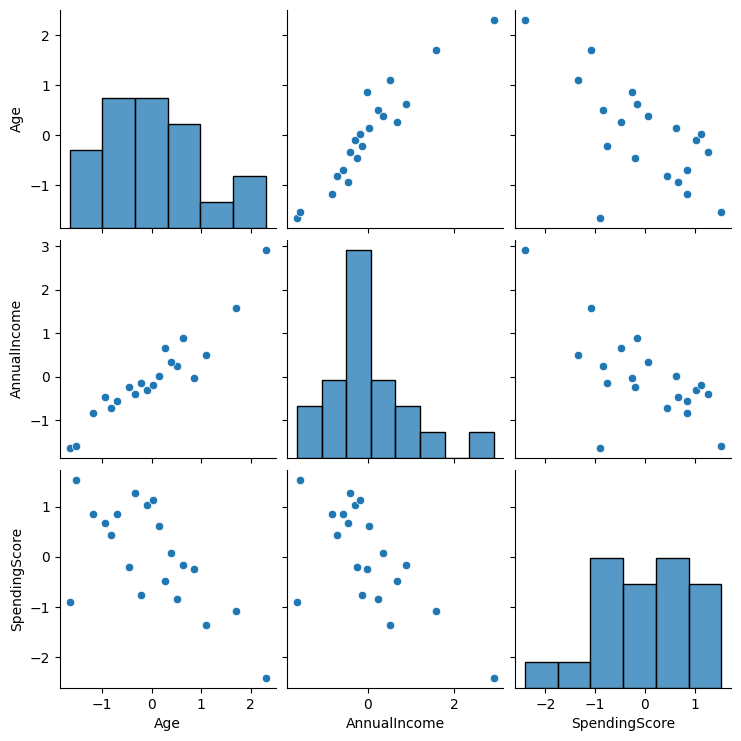

In [5]:
sns.pairplot(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

# Model Development:

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


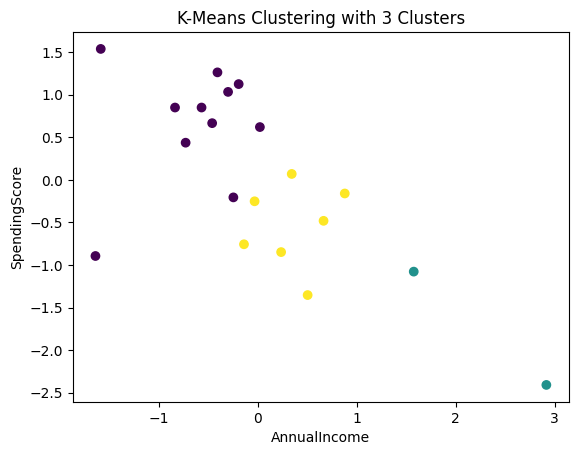

In [8]:
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()

In [9]:
sse = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

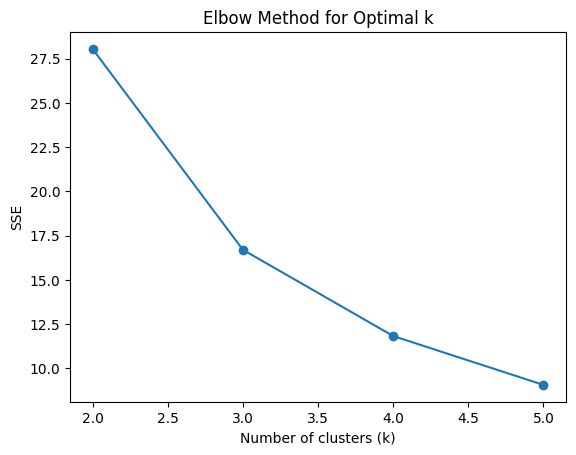

In [10]:
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])
    silhouette_avg = silhouette_score(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']], cluster_labels)
    print(f"For n_clusters = {k}, the Silhouette Score is {silhouette_avg}")

For n_clusters = 2, the Silhouette Score is 0.4306792532260083
For n_clusters = 3, the Silhouette Score is 0.39635035707595223
For n_clusters = 4, the Silhouette Score is 0.40249159458531514
For n_clusters = 5, the Silhouette Score is 0.3502203789488605


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# Model Evaluation:

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
inertia = kmeans.inertia_
print(f"Inertia (Sum of squared distances to centroids): {inertia}")

silhouette_avg = silhouette_score(df_scaled[['Age', 'AnnualIncome', 'SpendingScore']], df_scaled['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Inertia (Sum of squared distances to centroids): 16.69901130533106
Silhouette Score: 0.39635035707595223


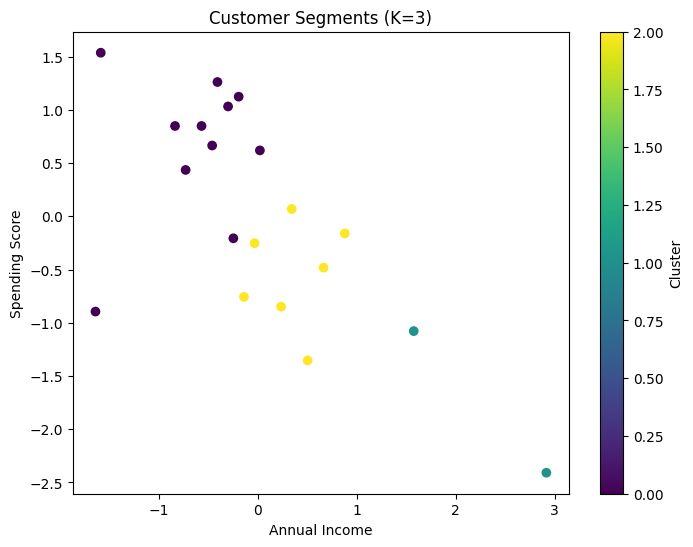

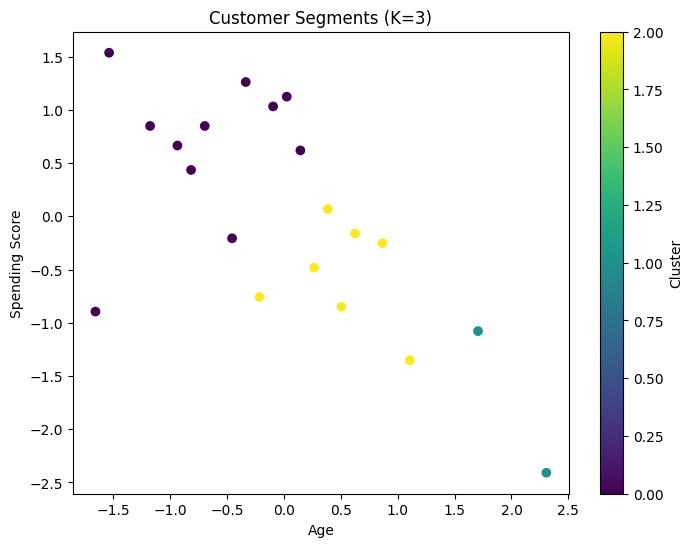

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments (K=3)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Age'], df_scaled['SpendingScore'], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments (K=3)')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
for i in range(3):
    cluster = df_scaled[df_scaled['Cluster'] == i]
    print(f"\nCluster {i} Characteristics:")
    print(cluster.describe())


Cluster 0 Characteristics:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count   11.000000  11.000000     11.000000      11.000000     11.0
mean     9.272727  -0.686003     -0.631899       0.661100      0.0
std      5.934491   0.609044      0.542635       0.691097      0.0
min      1.000000  -1.658204     -1.641181      -0.894674      0.0
25%      4.500000  -1.057405     -0.783047       0.527628      0.0
50%     10.000000  -0.696926     -0.461247       0.848794      0.0
75%     12.500000  -0.216287     -0.273530       1.078197      0.0
max     19.000000   0.144192      0.021453       1.537005      0.0

Cluster 1 Characteristics:
       CustomerID       Age  AnnualIncome  SpendingScore  Cluster
count    2.000000  2.000000      2.000000       2.000000      2.0
mean     6.000000  2.006667      2.247238      -1.743468      1.0
std      1.414214  0.424829      0.948113       0.940835      0.0
min      5.000000  1.706267      1.576821      -2.408738      1.0
25%      5.

# Report and Visualizations:


In [16]:
report = """


Customer Segmentation Report
1. Data Preprocessing
Steps Taken:
Loading the Dataset: The dataset was loaded and inspected to understand its structure. It contained four columns: CustomerID, Age, AnnualIncome, and SpendingScore.
Handling Missing Values: Upon checking for missing values, none were found in the dataset.
Scaling the Data: The dataset's numerical features (Age, AnnualIncome, and SpendingScore) were scaled using StandardScaler to standardize them. This ensures that all features are on a similar scale and prevents any feature from dominating the clustering process.

2. Model Development
K-Means Clustering Implementation:
I initially implemented the K-Means clustering algorithm with k=3 clusters.
Inertia and Silhouette Score were used to evaluate the performance of the model and decide the optimal number of clusters.

Evaluating Different Values of k:
Tried different values of k (from 2 to 5).
Elbow Method: The Elbow Method was used to identify the optimal number of clusters. This involves plotting the sum of squared errors (SSE) for different k values and looking for the "elbow point" where the decrease in SSE becomes less significant.
Silhouette Score: The Silhouette Score was calculated for each value of k to assess how well-separated the clusters were. A higher score indicates better-defined clusters.

3. Choosing the Optimal Value of k
The Elbow Method showed a noticeable "elbow" at k=3, indicating that this is the optimal number of clusters.
Additionally, the Silhouette Score for k=3 was reasonably high, supporting the decision to use 3 clusters.

4. Clustering Results and Interpretation
After running K-Means clustering with k=3, the customers were divided into three distinct groups based on their Age, AnnualIncome, and SpendingScore.
Cluster 0: Represented customers with low income and average spending scores. These could be budget-conscious customers.
Cluster 1: Included high-income customers with low spending scores. These customers may have significant income but are relatively cautious in spending.
Cluster 2: Comprised of younger customers with high spending scores and moderate income levels. These could be impulsive buyers or those with high spending tendencies despite moderate income.

5. Visualizations
Pair Plot: Visualized the relationship between features (Age, AnnualIncome, SpendingScore) using a pair plot.
Scatter Plot: Clusters were visualized using scatter plots, showing the relationships between Annual Income and Spending Score, as well as Age and Spending Score.

6. Conclusion
Based on the analysis, 3 distinct customer segments were identified.
The Elbow Method and Silhouette Score confirmed that k=3 was the most suitable choice for clustering.
The distinct characteristics of the clusters provide valuable insights for customer segmentation, allowing targeted marketing and product recommendations based on customer profiles.

"""
print(report)




Customer Segmentation Report
1. Data Preprocessing
Steps Taken:
Loading the Dataset: The dataset was loaded and inspected to understand its structure. It contained four columns: CustomerID, Age, AnnualIncome, and SpendingScore.
Handling Missing Values: Upon checking for missing values, none were found in the dataset.
Scaling the Data: The dataset's numerical features (Age, AnnualIncome, and SpendingScore) were scaled using StandardScaler to standardize them. This ensures that all features are on a similar scale and prevents any feature from dominating the clustering process.

2. Model Development
K-Means Clustering Implementation:
I initially implemented the K-Means clustering algorithm with k=3 clusters.
Inertia and Silhouette Score were used to evaluate the performance of the model and decide the optimal number of clusters.

Evaluating Different Values of k:
Tried different values of k (from 2 to 5).
Elbow Method: The Elbow Method was used to identify the optimal number of cluster